In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import datasets,metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np

bank = pd.read_csv("bank.csv",delimiter=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank.job=le.fit_transform(bank.job)
bank.marital=le.fit_transform(bank.marital)
bank.education=le.fit_transform(bank.education)
bank.default=le.fit_transform(bank.default)
bank.housing=le.fit_transform(bank.housing)
bank.loan=le.fit_transform(bank.loan)
bank.contact=le.fit_transform(bank.contact)
bank.month=le.fit_transform(bank.month)
bank.poutcome=le.fit_transform(bank.poutcome)
bank.y=le.fit_transform(bank.y)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [4]:
from sklearn.decomposition import PCA
X = bank.drop('y',axis=1)
y=bank['y']
pca=PCA(n_components=8)
newX=pca.fit_transform(X)
newX

array([[ 3.64582408e+02, -1.84649224e+02, -4.00096687e+01, ...,
         1.88974083e+00, -6.01277439e+00,  3.52177408e+00],
       [ 3.36649152e+03, -3.78623322e+01,  2.98432342e+02, ...,
         1.09434222e+00, -2.66521229e+00,  1.85245413e+00],
       [-7.24588715e+01, -7.76753500e+01,  2.90628836e+02, ...,
         2.48174715e+00,  1.68383899e+00, -5.20223562e+00],
       ...,
       [-1.12750827e+03, -1.14727440e+02, -3.99394066e+01, ...,
         7.79681714e+00,  5.76745323e+00,  2.67408512e+00],
       [-2.85420151e+02, -1.34530953e+02,  1.72072657e+02, ...,
        -8.29369891e-01,  4.44683181e+00, -1.99894358e+00],
       [-2.86703095e+02,  8.16497721e+01,  2.09084613e+02, ...,
         1.25069483e+00,  3.79960279e+00, -4.57579550e+00]])

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(newX,y,test_size=0.25,random_state=0)
print(X_train.shape)

(3390, 8)


In [8]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_gnb_score = gnb.predict_proba(X_test)
gnb.score(X_test,y_test)

0.8850574712643678

In [9]:
from sklearn.metrics import roc_curve,auc
fpr_gnb,tpr_gnb,thresholds_gnb = roc_curve(y_test,y_gnb_score[:,1])
auc(fpr_gnb,fpr_gnb)

0.49999999999999994

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20,max_depth=4)
clf.fit(X_train,y_train)
y_clf_score = clf.predict_proba(X_test)

<Figure size 640x480 with 0 Axes>

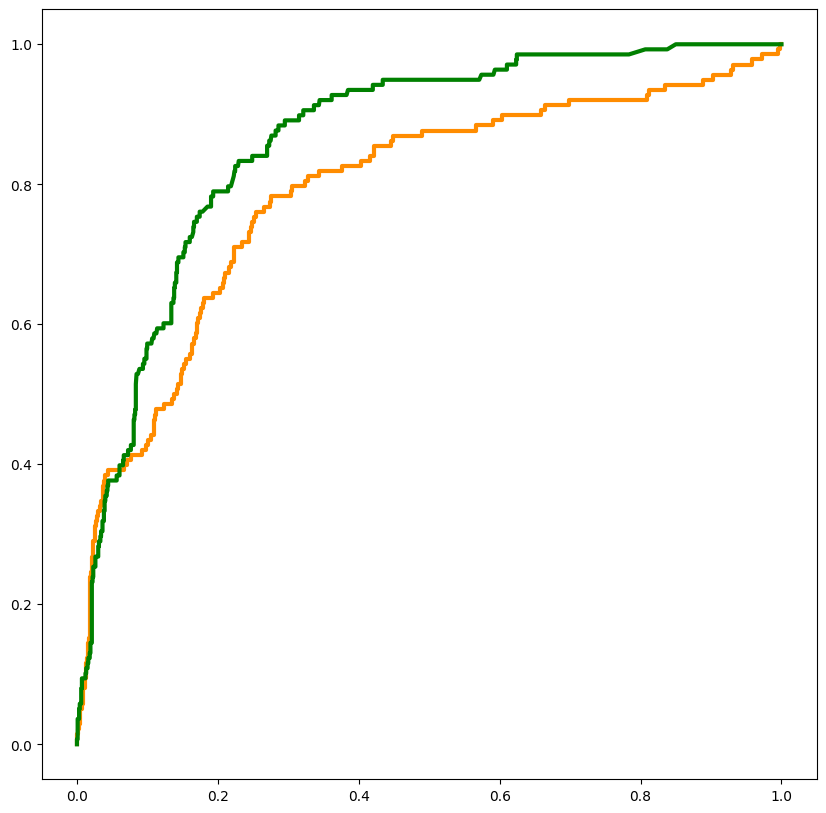

In [11]:
gfpr,gtpr,gthreshold = roc_curve(y_test,y_gnb_score[:,1])
cfpr,ctpr,gthreshold = roc_curve(y_test,y_clf_score[:,1])

roc_auc_gussian = auc(gfpr,gtpr)
roc_auc_clf = auc(cfpr,ctpr)
plt.figure()
lw = 3
plt.figure(figsize=(10,10))

plt.plot(gfpr,gtpr,color='darkorange',lw=lw,label='GaussianNB (area=%0.2f)' % roc_auc_gussian)
plt.plot(cfpr,ctpr,color='green',lw=lw,label='RandomForest (area=%0.2f)' % roc_auc_clf)

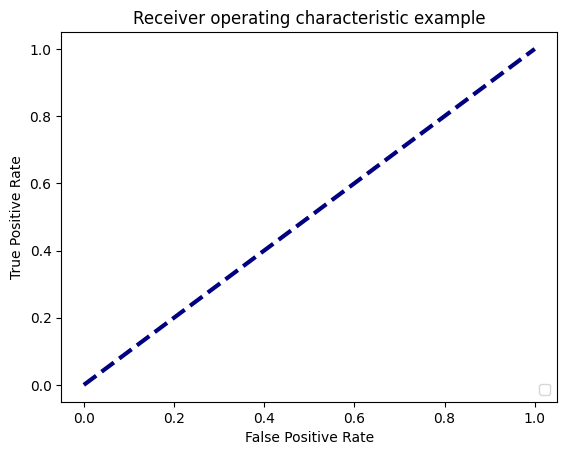

In [17]:
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

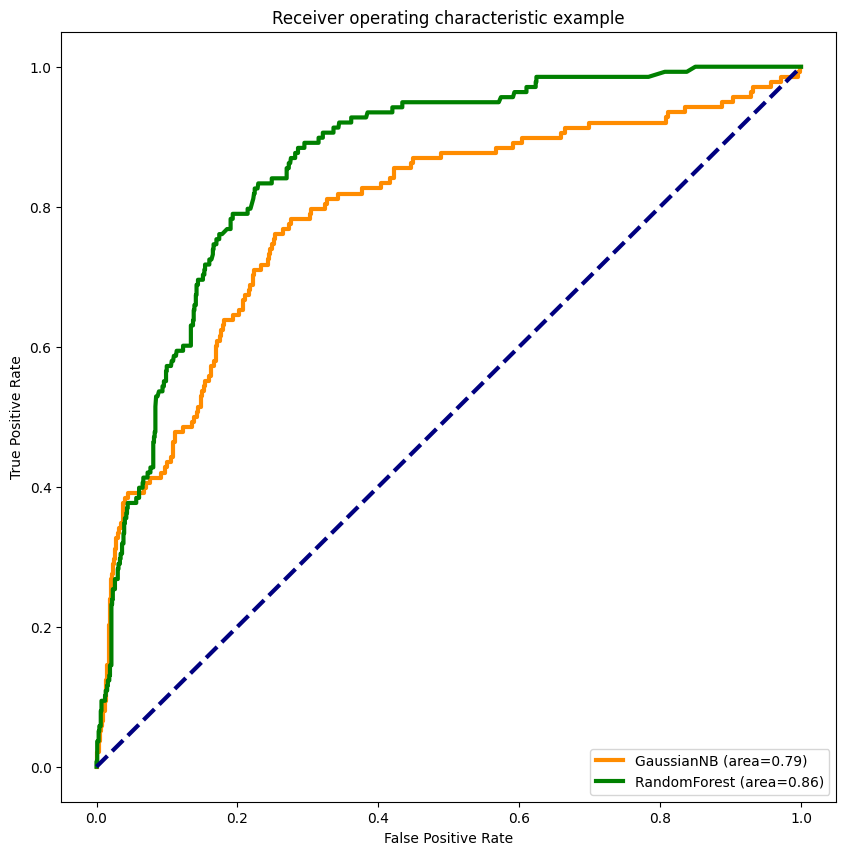

In [18]:
plt.figure(figsize=(10,10))
lw = 3
plt.plot(gfpr, gtpr, color='darkorange', lw=lw, label='GaussianNB (area=%0.2f)' % roc_auc_gussian)
plt.plot(cfpr, ctpr, color='green', lw=lw, label='RandomForest (area=%0.2f)' % roc_auc_clf)
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()


In [20]:
from pandas.core. frame import dataclasses_to_dicts
import numpy as np
from sklearn import datasets, preprocessing, decomposition, model_selection
from sklearn import ensemble, naive_bayes, metrics
from matplotlib import pyplot
from mlxtend import plotting
import pandas as pd
from itertools import chain
a = pd.read_csv("bank.csv")